In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

C:\Programs\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Programs\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
bdc = pd.read_csv('unicorns.csv')

### The Data
The data comes from a user named "The Devastator" on Kaggle. It consists of a few very interesting columns including the last valuation of each startup, as well as it's location, the industry it operates in, and its investors.

In [3]:
bdc.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


#### How many startups are in each industry, and where are those startups located?
Since the startups have both location and industry information attached to them, I figured it would be interesting to look at both the amount of startups in each industry, and the proportions of each industry each country accounts for.

In [4]:
# Clean up some inconsistent formatting in the "Industry" column.
bdc['Industry'] = bdc['Industry'].map(str.title)
bdc['Industry'] = bdc['Industry'].map(str.strip)
# Turn the lists provided in the "Investors" column into python lists.
bdc['Investors'] = bdc['Investors'].map(lambda x:re.sub('[\[\]"]', '', x).split(','))

In [5]:
industries_by_country = pd.DataFrame([])
# Count each industry for each country and turn that into a dataframe.
for country in bdc['Country'].unique():
    industries_in_country = bdc[bdc['Country'] == country]['Industry'].value_counts()
    industries_in_country.name = country
    industries_by_country = industries_by_country.append(industries_in_country)

industries_by_country.fillna(0, inplace=True)
# Sort countries from most startups to least.
industries_by_country['Total'] = industries_by_country.sum(axis=1)
industries_by_country.sort_values('Total', inplace=True, ascending=False)
industries_by_country.drop('Total', axis=1, inplace=True)
# Sort industries from most startups to least.
industries_by_country = industries_by_country.reindex(industries_by_country.sum(axis=0).sort_values(ascending=True).index, axis=1)

In [6]:
industries_by_country.head()

,Travel,Consumer & Retail,Edtech,Auto & Transportation,Hardware,Mobile & Telecommunications,Data Management & Analytics,Cybersecurity,Other,"Supply Chain, Logistics, & Delivery",Artificial Intelligence,Health,E-Commerce & Direct-To-Consumer,Internet Software & Services,Fintech
United States,1.0,13.0,9.0,10.0,13.0,13.0,35.0,45.0,33.0,26.0,52.0,72.0,27.0,163.0,133.0
China,3.0,8.0,12.0,18.0,18.0,13.0,2.0,1.0,6.0,12.0,19.0,10.0,28.0,15.0,8.0
India,1.0,0.0,7.0,2.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,2.0,17.0,13.0,17.0
United Kingdom,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,3.0,27.0
Germany,3.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,1.0,5.0,4.0,6.0


In [7]:
[*[1, 3, 4], 2]

[1, 3, 4, 2]

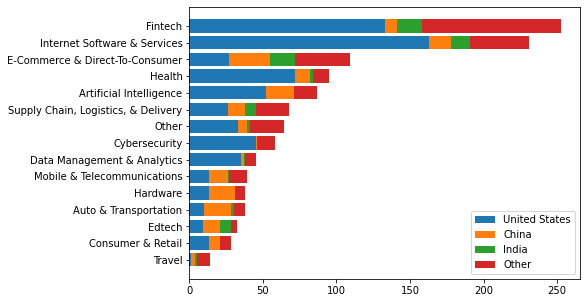

In [8]:
n = 3

fig, ax = plt.subplots(figsize=(7, 5))
handles = []

top_n_countries = industries_by_country.head(n)
left = np.zeros(top_n_countries.shape[1])

for country in top_n_countries.index:
    values = top_n_countries.loc[country]
    industries = top_n_countries.columns
    
    handles.append(ax.barh(industries, values, left=left))
    
    left += values

remain_country_count = industries_by_country.shape[0] - n
other_countries = industries_by_country.tail(remain_country_count)
handles.append(ax.barh(other_countries.columns, 
                       other_countries.sum(axis=0), 
                       left=left)
)

ax.legend(handles, [*top_n_countries.index[:n], 'Other'])
plt.show()

The US seems to have dominance over many industries, especially cybersecurity and health. However, in oher industries like hardware and auto & transportation, China takes the majority. Still others are very competitive, like e-commerce businesses.

This tells us that certain countries do fare better in certain industries, and on a larger scale certain industries are more or less easy to break into. Feel free to speculate on the underlying causes here; I'm personally going for both goverment regulation and a lack of government regulation.

#### What is the value of each industry?
Now that we know the general distribution of the startups in our data we can look at a more - ...profitable? Actionable? Simple? - question: What is the most valued industry? Or for the purposes of this analysis, which industry has the highest average valuation?

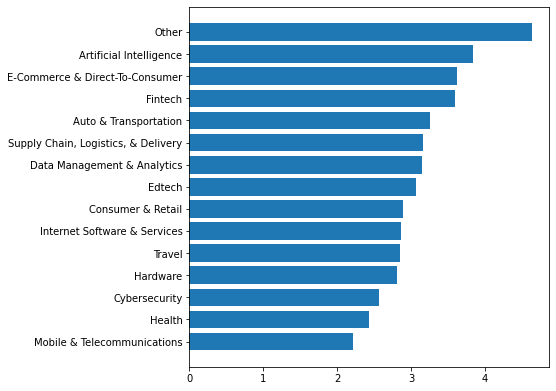

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

industry_means = bdc['Last Valuation (Billion $)'].groupby(bdc['Industry']).mean()
industry_means.sort_values(inplace = True)

ax.barh(industry_means.index, industry_means)
plt.show()

From this graph we can see that aside from the mysterious and ever elusive "Other", the most valued industry is AI. This makes sense from a gut perspective as well; a lot of the fervor in the tech industry is around AI and its potential, so obviously investors want to get in on it as soon as possible.

In [10]:
bdc.sort_values('Last Valuation (Billion $)', ascending = False).head(5)

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
1121,"10/31/2022, 2:32:38 AM",ByteDance,https://www.cbinsights.com/company/bytedance,140.0,4/7/2017,2017,Beijing,China,Artificial Intelligence,"[Sequoia Capital China, SIG Asia Investments, ...",NaN
1195,"10/31/2022, 2:32:38 AM",SpaceX,https://www.cbinsights.com/company/space-explo...,127.0,12/1/2012,2012,Hawthorne,United States,Other,"[Founders Fund, Draper Fisher Jurvetson, Rothe...",NaN
1079,"10/31/2022, 2:32:39 AM",SHEIN,https://www.cbinsights.com/company/shein,100.0,7/3/2018,2018,Shenzhen,China,E-Commerce & Direct-To-Consumer,"[Tiger Global Management, Sequoia Capital Chin...",NaN
1188,"10/31/2022, 2:32:39 AM",Stripe,https://www.cbinsights.com/company/stripe,95.0,1/23/2014,2014,San Francisco,United States,Fintech,"[Khosla Ventures, LowercaseCapital, capitalG]",NaN
1078,"10/31/2022, 2:32:40 AM",Canva,https://www.cbinsights.com/company/canva,40.0,1/8/2018,2018,Surry Hills,Australia,Internet Software & Services,"[Sequoia Capital China, Blackbird Ventures, Ma...",NaN


I also wanted to look at what the top 5 companies actually were, and while SpaceX and ByteDance are to be expected if you know those companies. (I actually didn't know ByteDance but I looked it up and yeah it makes perfect sense) 

However I was surprised to see Canva there. It's not nearly as valuable as the others but it is still wildly outside of my own expectations.

#### What investors have the most diverse portfolios?
We've talked a lot about startups and how investors see them, but who are these investors actually? Let's see who these investors are, and what the most common ones are investing in.

In [11]:
investors = pd.get_dummies(bdc['Investors'].apply(pd.Series).stack()).sum(level=0)

In [12]:
ranked_investors = investors.sum(axis=0).sort_values(ascending=False)

In [13]:
ranked_investors.head(10)

Accel                          64
Andreessen Horowitz            60
Tiger Global Management        57
Insight Partners               56
Sequoia Capital                53
Sequoia Capital China          48
General Catalyst               43
Lightspeed Venture Partners    40
SoftBank Group                 35
Index Ventures                 32
dtype: int64

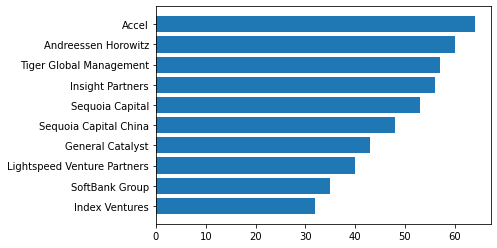

In [14]:
top_10_investors = ranked_investors.head(10)
top_10_investors.sort_values(ascending=True, inplace=True)

plt.barh(top_10_investors.index[0:10], top_10_investors.head(10))
plt.show()

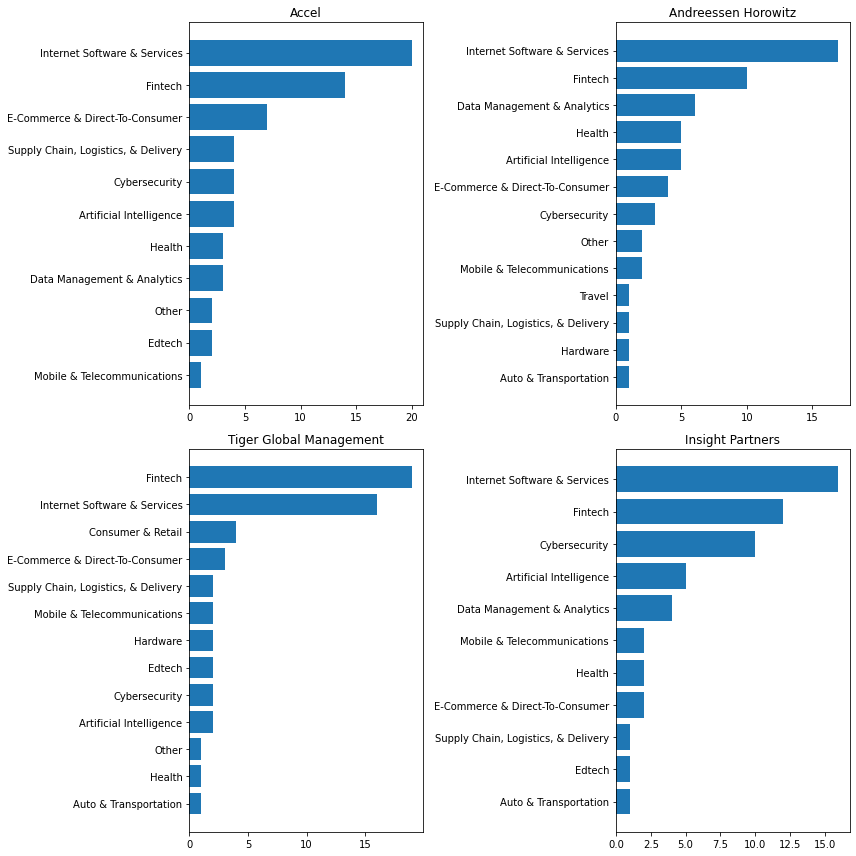

In [31]:
n = 4

fig, axs = plt.subplots(math.ceil(n/2), 2, figsize=(12, 12))

for i in range(n):
    investor = ranked_investors.index[i]
    ax = axs.flatten()[i]
    investor_portfolio = bdc[investors[investor] == 1].groupby('Industry').count()
    investor_portfolio = investor_portfolio.sort_values('Company')
    ax.barh(investor_portfolio.index, investor_portfolio['Company'])
    ax.set_title(investor)

fig.tight_layout()

While the names of the top 10 investors don't really tell us much, the industries they invest in do. We can see that internet software & services and fintech are the primary interests of the top four investors. After that the priorities are actually pretty individual to each investor.

#### What's in a name? (Bonus Round)
Now let's have a little fun. I wonder if we can find any trends related to the names, or at least the lengths of the names of companies.

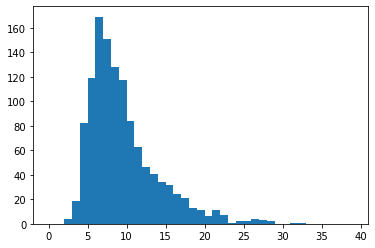

In [16]:
plt.hist(bdc['Company'].str.len(), bins=range(40))

plt.show()

Well, that is a normal distribution if I've ever seen one. It seems most companies have a name of around 5-10 characters, with only a couple having more than 30.

In [17]:
bdc[bdc['Company'].str.len() == 40]

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
170,"10/31/2022, 2:35:00 AM",Fresh Life Style Supply Chain Management,https://www.cbinsights.com/company/xianshenghuo,1.57,3/11/2022,2022,Chengdu,China,"Supply Chain, Logistics, & Delivery","[Guiyang Venture Capital, Longfor Capital, CAO...",NaN


Incidentally if you were wondering what the company with the longest name in the dataset was, it turns out to be Fresh Life Style Supply Chain Management. If you ask me it's cheating to put the thing your company does in the name, but if that was a rule SpaceX would just be X so I suppose you take the bad with the good.

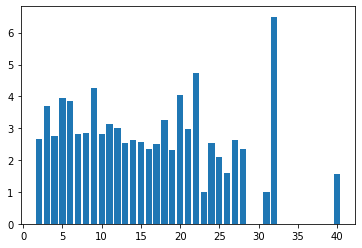

In [18]:
len_mean = bdc['Last Valuation (Billion $)'].groupby(bdc['Company'].str.len()).mean()
plt.bar(len_mean.index, len_mean)
plt.show()

Lastly I wanted to look at the ditribution of average valuation by name length as well. It does actually seem that the average is a little higher the shorter the name, but I would argue that's an issue of sample size more than anything. 

More specifically, I think that since we saw earlier that more companies are likely to have shorter names, there is a higher chance for there to be a very valuable company among the shorter named companies. So it's not that having a shorter name means you are more valuable, just that there are more companies, and therefore more highly valued companies, with short names.

### Using Deep Learning to Predict A Companies Valuation, Because Why Not?

##### Feature Creation

In [19]:
bdc.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[Next Play Ventures, Zeal Capital Partners, So...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet Software & Services,"[Accel, 14W, GS Growth]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data Management & Analytics,"[General Catalyst, Nexus Venture Partners, Del...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet Software & Services,"[Lightspeed India Partners, Sequoia Capital In...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[AWZ Ventures, Blackstone, Insight Partners]",NaN


In [20]:
investor_dummies = pd.get_dummies(bdc['Investors'].apply(pd.Series).stack())
industry_dummies = pd.get_dummies(bdc['Industry'])
city_dummies = pd.get_dummies(bdc['City'])
year = bdc['Year Joined']

In [21]:
X = pd.concat([industry_dummies, city_dummies], axis=0).sum(level=0)
y = bdc['Last Valuation (Billion $)']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

##### Model Training

In [23]:
from tensorflow import keras

In [24]:
model = keras.models.Sequential()

In [25]:
model.add(keras.layers.Dense(32, input_shape = (None, X.shape[1])))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1, activation = 'relu'))

In [26]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 32)          9536      
                                                                 
 dense_1 (Dense)             (None, None, 8)           264       
                                                                 
 dense_2 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 9,809
Trainable params: 9,809
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test))

Epoch 1/40
29/29 [==============================] - 1s 18ms/step - loss: 52.8133 - val_loss: 109.3389
Epoch 2/40
29/29 [==============================] - 0s 8ms/step - loss: 49.8765 - val_loss: 104.4101
Epoch 3/40
29/29 [==============================] - 0s 7ms/step - loss: 46.4802 - val_loss: 100.0300
Epoch 4/40
29/29 [==============================] - 0s 8ms/step - loss: 44.3577 - val_loss: 98.4480
Epoch 5/40
29/29 [==============================] - 0s 8ms/step - loss: 43.9447 - val_loss: 98.5217
Epoch 6/40
29/29 [==============================] - 0s 8ms/step - loss: 43.5514 - val_loss: 98.7310
Epoch 7/40
29/29 [==============================] - 0s 8ms/step - loss: 43.4180 - val_loss: 98.6469
Epoch 8/40
29/29 [==============================] - 0s 8ms/step - loss: 43.0660 - val_loss: 98.7715
Epoch 9/40
29/29 [==============================] - 0s 8ms/step - loss: 42.8726 - val_loss: 98.8488
Epoch 10/40
29/29 [==============================] - 0s 9ms/step - loss: 42.6463 - val_loss: 99.

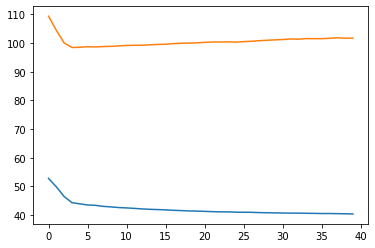

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Ok to be totally honest this was absolutely never going to work. The data provided is either too sparse and vague, or way too specific, to be useful. There are so many investors that have only invested in one company, and without that column there are very few patterns you can gather from just the location and industry a company is in.

That being said I'm sure there is some data I can pair this with, or some technique that can leverage this data to provide more insight than I am capable of extracting. So, while I am not spending any more time on this for now, if I do find something I'll come back and try it out.

This will either be my "one that got away" or I will completely forget about it.